In [37]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axisartist.axislines import AxesZero


In [38]:
x = np.linspace(-2,2, 100)
y = np.linspace(-2,2, 100)
X, Y = np.meshgrid(x, y)

def dist2(x, y, x0=0, y0=0):
    return (x-x0)**2 + (y-y0)**2
def bump(x, y, x0=0, y0=0, c=1):
    return np.exp(-c*dist2(x, y, x0, y0))
def flu(x, y):
    return 1.25 * bump(x, y, -0.6, 0.25, 3) + bump(x, y, 0.6, -0.25, 4)
def flux(x):
    return flu(x, 0)

Z = flu(X, Y)

LEVELS = [-0.2, 0.1, 0.45, 0.7, 0.9, 1.1]

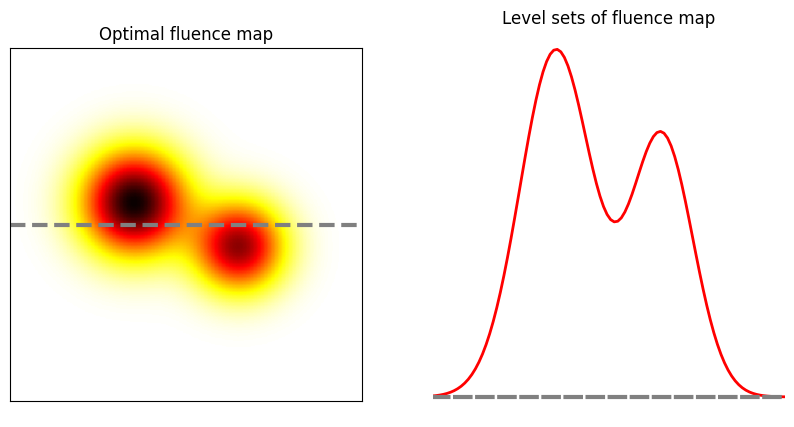

In [61]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(Z[::-1], cmap='hot_r', interpolation='hermite', extent=(-2,2,-2,2))
plt.plot([-2, 2], [0, 0], '--', color='grey', linewidth=3)
plt.xticks([])
plt.yticks([])
plt.title('Optimal fluence map')

plt.subplot(1, 2, 2, axes_class=AxesZero)
# render x-axis line
plt.gca().axis["xzero"].set_visible(True)
plt.gca().axis["xzero"].line.set_linewidth(3)
plt.gca().axis["xzero"].line.set_linestyle('--')
plt.gca().axis["xzero"].line.set_color('grey')
# do not draw frame
plt.gca().axis["top"].set_visible(False)
plt.gca().axis["bottom"].set_visible(False)
plt.gca().axis["right"].set_visible(False)
plt.gca().axis["left"].set_visible(False)
# plot red fluence
plt.plot(x, flux(x), color='red', linewidth=2)
plt.xticks([])
plt.xlim(-2,2)
plt.ylim(-0.06,None)
plt.title('Level sets of fluence map')

# plt.savefig('_fluence_map_discretization.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()